UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE - UFRN

DCA0209 - ALGORITMOS E ESTRUTURA DE DADOS II

Trabalho 03 - Unidade 02

Componentes do grupo:
*   Francisco Daniel Davi
*   Luiz Henrique Araújo Dantas

# Bibliotecas utilizadas para a construção do trabalho

In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=38f7fd062c447ed7b6b77c7067deab1b1c4ce660fbc458b11a433b7785e87948
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
!pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.3 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd

#Criando o gráfico

Utilizamos como tema para nosso trabalho a nossa instituição a Universidade Federal do Rio Grande do Norte, para o Seed colocamos o título da página disponível no link abaixo na Wikipedia.

In [ ]:
#https://en.wikipedia.org/wiki/Federal_University_of_Rio_Grande_do_Norte
SEED = "Federal University of Rio Grande do Norte".title()
STOPS = ("International Standard Name Identifier",
         "Viaf (Identifier)",
         "Isni (Identifier)",
         "Isbn (Identifier)",
         "Education in Rio Grande do Norte",
         "Federal universities of Brazil",
         "University")

Distribuição em conjuntos para refinar a busca, como mostrado no exemplo em sala.

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Federal University Of Rio Grande Do Norte
1 Academic Ranking Of World Universities
1 Alberto Santos-Dumont
Could not load Alberto Santos-Dumont
1 Amazonas State University
1 Anhanguera-Uniderp University
1 Anhembi Morumbi University
1 Bahia State University
1 Bandeirante University Of São Paulo
1 Brazil
1 Brazil University Rankings
1 Brazilian Real
1 Brutalist Architecture
1 Caicó
1 Catholic University Of Brasília
1 Catholic University Of Pelotas
1 Catholic University Of Pernambuco
1 Catholic University Of Petrópolis
1 Catholic University Of Salvador
1 Catholic University Of Santos
1 Ceará State University
1 Centro Brasileiro De Pesquisas Físicas
1 Centro Universitário Eurípedes De Marília
1 Centro Universitário Ritter Dos Reis
1 Centro Universitário Uninovafapi
1 Centro Universitário Da Fei
1 Centro Universitário Das Faculdades Metropolitanas Unidas
1 Centro Universitário De Brasília
1 Chancellor (Education)
1 College And University Rankings
1 Currais Novos
1 Dom Bosco Catholic Univ

Quantidade total de nós e conexões desse grafo inicial

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

12252 nodes, 53703 edges


In [ ]:
# make a copy of raw graph
original = g.copy()

#Etapa de pré-processamento


Removendo as duplicatas existentes no nosso dataset

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Graduate Student', 'Graduate Students'), ('Asian Brazilian', 'Asian Brazilians'), ('Cashew', 'Cashews'), ('Italian Brazilian', 'Italian Brazilians'), ('Japanese Brazilian', 'Japanese Brazilians'), ('Mango', 'Mangos'), ('Pardo Brazilian', 'Pardo Brazilians'), ('Public Service', 'Public Services'), ('Rainforest', 'Rainforests'), ('White Brazilian', 'White Brazilians'), ('World Heritage Site', 'World Heritage Sites'), ('Skyscraper', 'Skyscrapers'), ('Law', 'Laws'), ('Social Service', 'Social Services'), ('Jesuit', 'Jesuits'), ('Literature', 'Literatures'), ('Environmental Science', 'Environmental Sciences'), ('Doctorate', 'Doctorates'), ("Master'S Degree", "Master'S Degrees"), ('Life Science', 'Life Sciences'), ('Natural Science', 'Natural Sciences'), ('Nobel Prize', 'Nobel Prizes'), ('Diocese', 'Dioceses'), ('Science', 'Sciences'), ('Institution', 'Institutions'), ('Agricultural Science', 'Agricultural Sciences'), ('São Paulo State Technological College', 'São Paulo State Technologica

Nova quantidade de nós e conexões que existem no nosso grafo.

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

12188 nodes, 53661 edges


Checagem de cada grau de cada nó existente no grafo, foi plotado um histograma para checar em qual o grau a maior parte dos nós está concentrado.

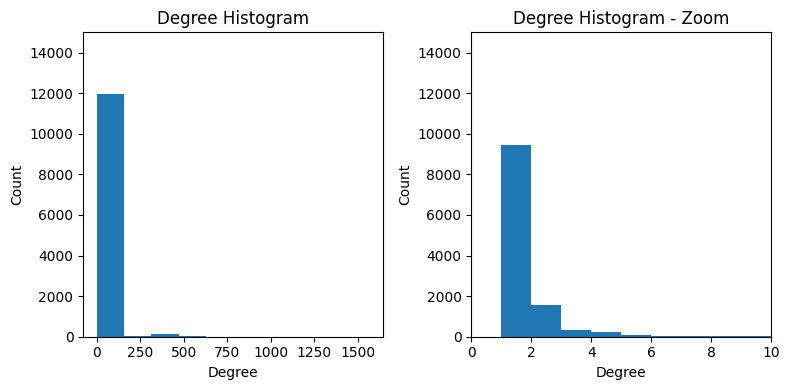

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

Notamos que no histograma acima, existe uma grande concentração de nós de grau 1, iremos filtrar esses nós para que fiquem somente os nós de grau 2 em diante.

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

2728 nodes, 44201 edges


Novo quantitativo de nós e conexões no grafo, notamos que mais de 70% dos nós foram removidos e cerca de 19% de conexões removidas, dessa maneira fazemos com que nossa rede fique mais compacta.

In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - 2728/12252)))
print("Edges removed: {:.2f}%".format(100*(1 - 44201/54586)))
print("Edges per nodes: {:.2f}".format(44201/2728))

Nodes removed: 77.73%
Edges removed: 19.03%
Edges per nodes: 16.20


#Capturando os nós mais importantes do nosso grafo

Lista de todos os nós que possuem maior importância dentro do grafo, junto com o número de conexões existentes.

In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

170 University Of São Paulo
169 Federal University Of Rio Grande Do Norte
169 Instituto Tecnológico De Aeronáutica
168 Instituto Butantan
168 Federal Institute Of São Paulo
168 Federal University Of Mato Grosso Do Sul
168 Federal University Of Minas Gerais
168 National Institute Of Amazonian Research
168 Instituto Benjamin Constant
168 Mato Grosso Do Sul State University
168 São Paulo State Technological College
168 Federal University Of Paraná
168 International Institute For Neuroscience Of Natal
168 Laboratório Nacional De Luz Síncrotron
167 Naval School (Brazil)
167 Mackenzie Presbyterian University
167 Federal University Of Southern And Southeastern Pará
167 Universidade Da Amazônia
167 Instituto Militar De Engenharia
167 National Observatory (Brazil)
167 Federal University Of Amazonas
167 Federal University Of Acre
167 Federal Institute Of Bahia
167 Federal University Of Mato Grosso
167 Federal Center For Technological Education Of Rio De Janeiro
167 Federal University Of Tocantin

Plotagem dos quatro grafos com métricas de centralidade de grau, proximidade, intermediação e autovetores.

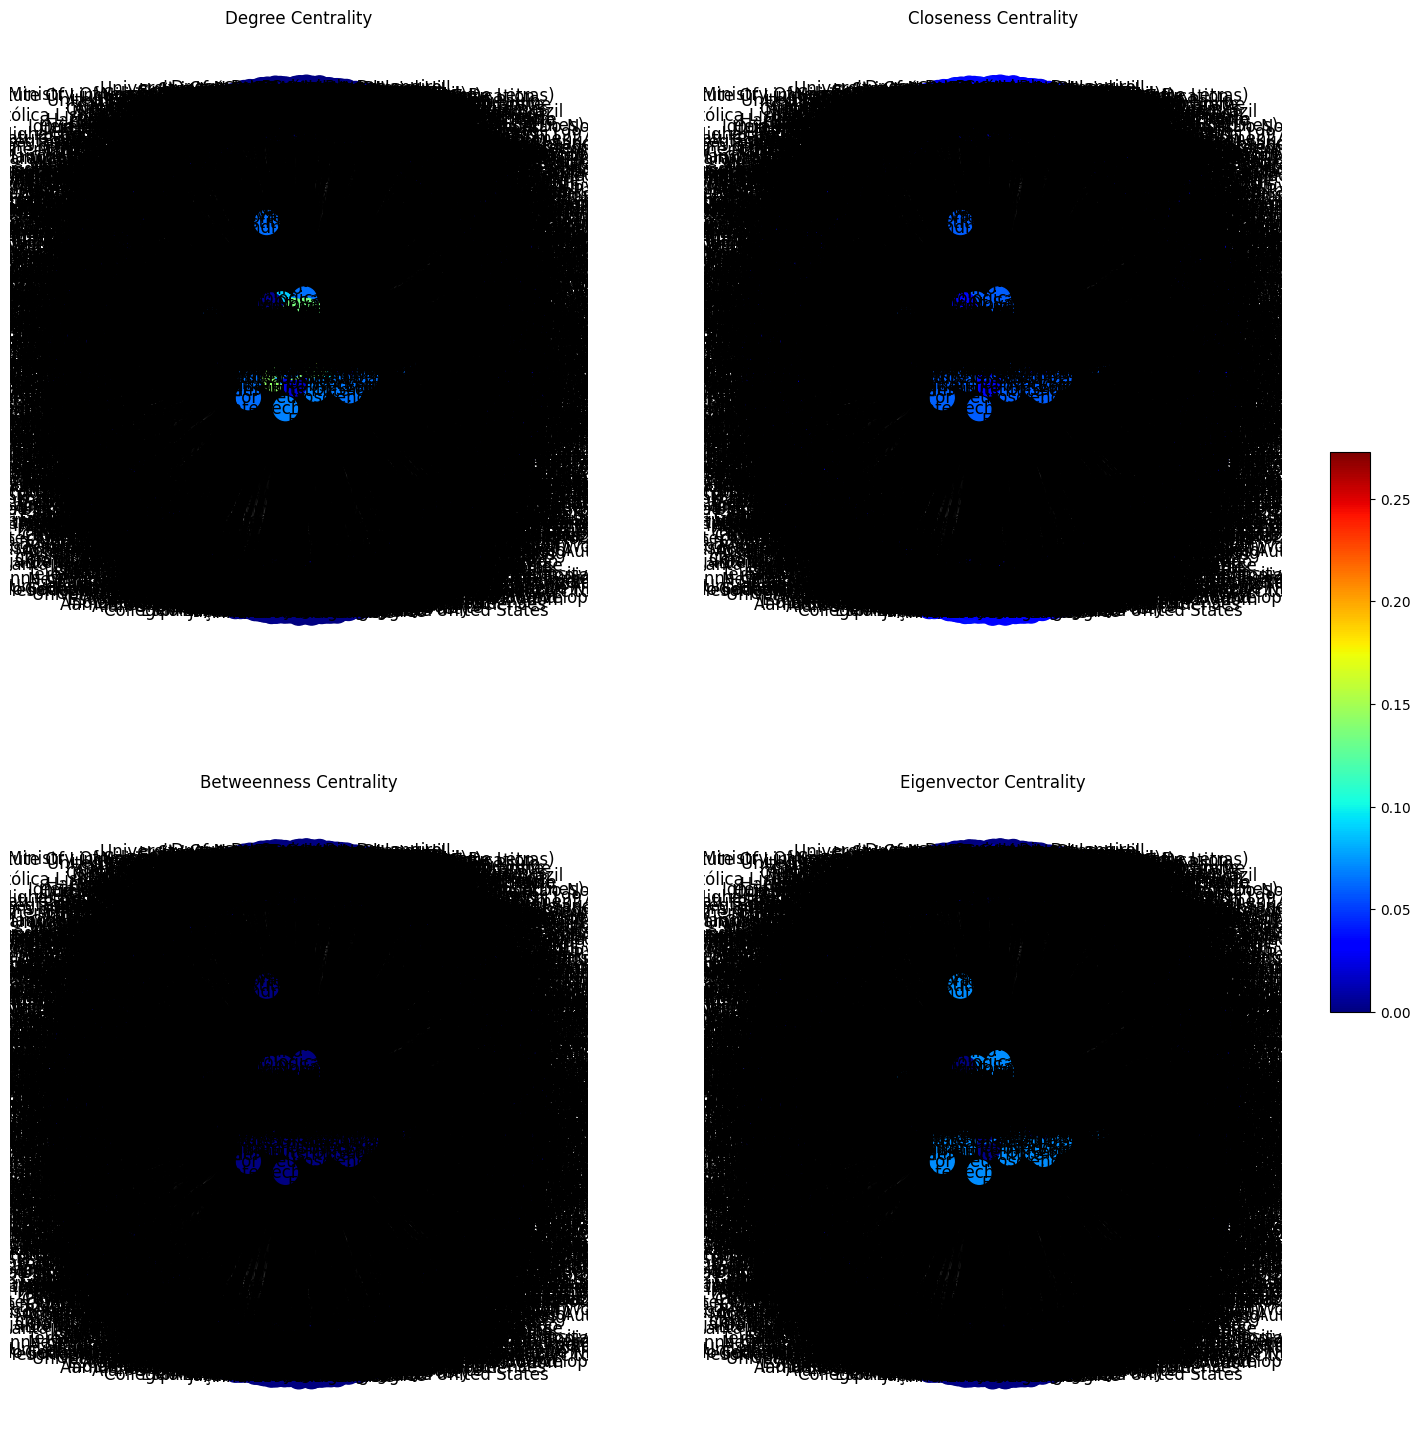

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,14))

# max value of metrics 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(gsub).items()]),
                      max([v for k, v in nx.degree_centrality(gsub).items()]),
                      max([v for k, v in nx.closeness_centrality(gsub).items()]),
                      max([v for k, v in nx.betweenness_centrality(gsub).items()])])

# layout position
pos = nx.spring_layout(gsub,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(gsub)).values())
color_closeness = list(dict(nx.closeness_centrality(gsub)).values())
color_betweenness = list(dict(nx.betweenness_centrality(gsub)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(gsub)).values())

# 
# draw edges
#
# degree centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# draw labels
#
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[0,0])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[0,1])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[1,0])
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='black', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centrality")
ax[0,1].set_title("Closeness Centrality")
ax[1,0].set_title("Betweenness Centrality")
ax[1,1].set_title("Eigenvector Centrality")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

#Distribuições de centralidade: PDF e CDF

Para essa etapa, utilizaremos a PDF e o CDF para gerar histogramas dos graus dos nós do nosso grafo.

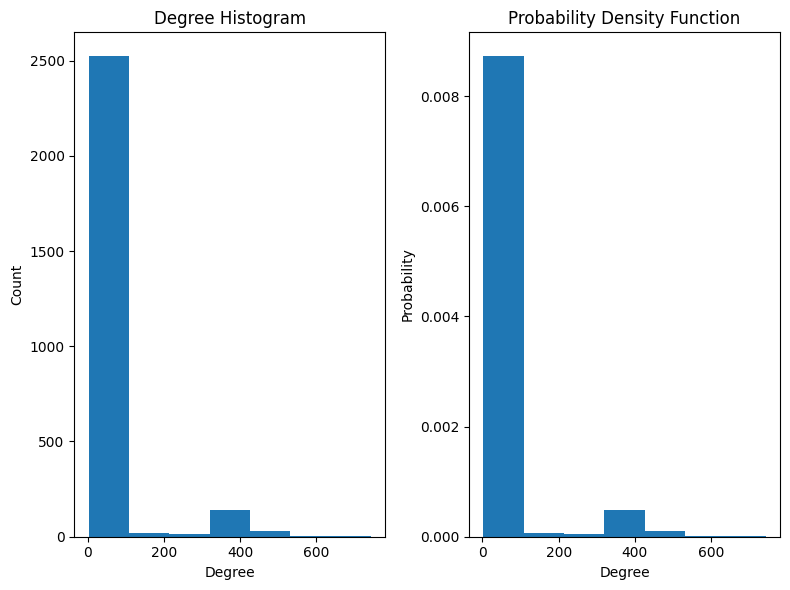

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [ ]:
bin_width = np.diff(all_data[1])
bin_width

all_data[0].sum()

all_data[0]/(all_data[0].sum() * bin_width)

array([8.72157362e-03, 6.57057489e-05, 4.14983677e-05, 4.77231229e-04,
       1.07204117e-04, 1.38327892e-05, 6.91639462e-06])

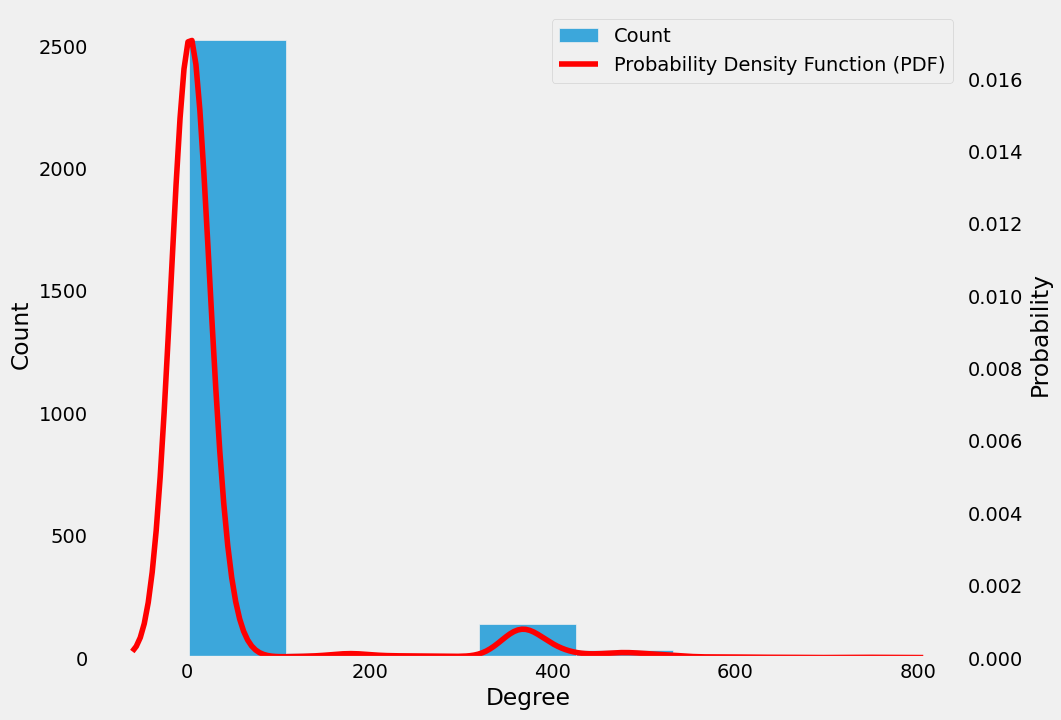

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()
     

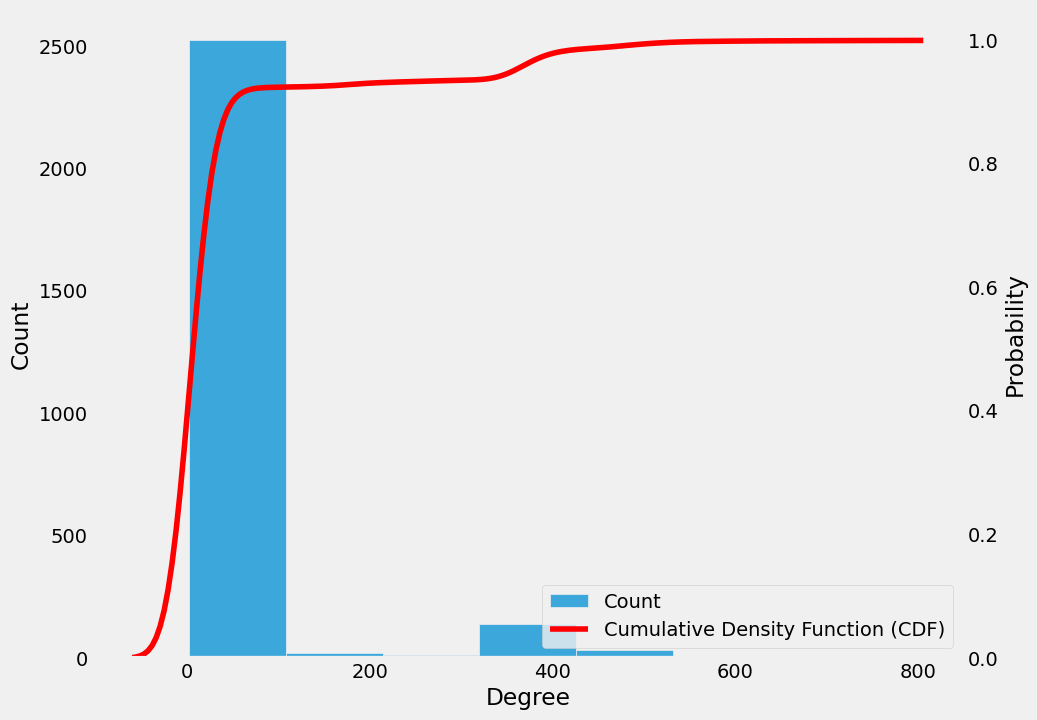

In [ ]:

# porcentagem de conexões que os nós de determinado grau possui em relação às conexões da rede.
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()
     

plt.style.use("ggplot")

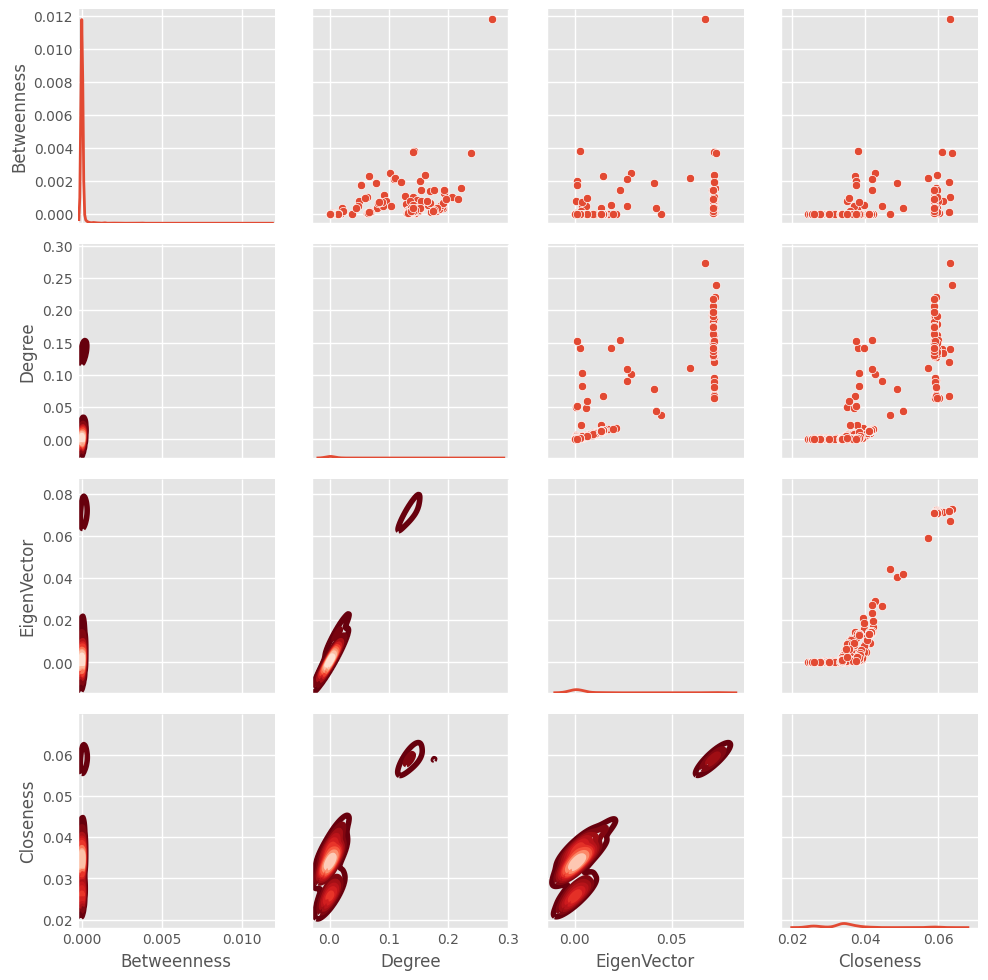

In [ ]:
plt.style.use("ggplot")

bc = pd.Series(nx.betweenness_centrality(gsub))
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()


# Cores e Shell

Aqui analisamos os cores e o shell que está ligado à camada mais profunda da nossa rede, fazendo a analogia com uma cebola, cada camada de uma cebola pode ser correspondente à um shell da nossa rede, que ao removermos vemos quais nós estavam ligados àquela camada e o core é o conteúdo que está associado a cada nível da cebola. Sendo assim, iremos calcular qual é o último core e quais são os nós que fazem conexão com o último core (último shell).

In [ ]:
k_cores = set([v for k,v in nx.core_number(gsub).items()])

In [ ]:
print(k_cores)
print(len(k_cores))

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 158, 31, 32, 33, 34, 35, 30, 37, 167, 168, 169, 170, 171, 41, 45, 49, 138, 65, 67, 327, 71, 210, 215, 98, 102}
51


In [25]:
k_shell = list(nx.k_shell(gsub, 327))

In [26]:
print(k_shell)

['University Of Vassouras', 'Federal University Of Alfenas', 'Federal University Of Western Bahia', 'Universidade Feevale', 'Rio De Janeiro State University', 'Federal University Of Piauí', 'Federal Rural University Of Pernambuco', 'Federal University Of Pará', 'Federal University Of Fronteira Sul', 'Federal Rural University Of The Semi-Arid Region', 'Federal University Of Cariri', 'Minas Gerais State University', 'University Of Cruz Alta', 'Santa Catarina State University', 'Goiás State University', 'Bandeirante University Of São Paulo', 'Federal University Of Rio Grande', 'Higher Education Institute Of Brasilia', 'Federal University Of Rio Grande Do Norte', 'Centro Universitário Ritter Dos Reis', 'Federal University Of The State Of Rio De Janeiro', 'Federal University Of Pampa', 'University Center Of Belo Horizonte', 'Federal University Of Acre', 'Federal University Of Minas Gerais', 'Federal University Of Sergipe', 'Federal University Of Campina Grande', 'Federal University Of Grand

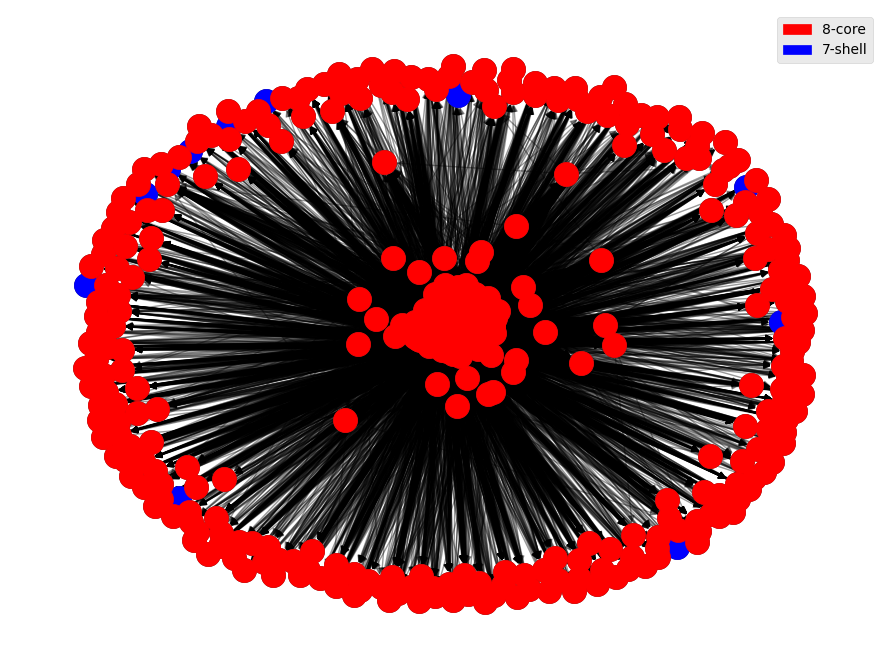

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
core = [node for node, deg in dict(g.degree()).items() if deg >= 7]
# Find k-cores
gsub_core_13 = nx.k_shell(gsub, 7)
gsub_core_17 = nx.k_core(gsub, 8)
g = nx.subgraph(g, core)
# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(gsub_core_13,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(gsub_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='8-core')
blue_patch = mpatches.Patch(color='blue', label='7-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()